## 2.1 単利、複利、現在価値

時点tにおいて投資家が保有する資金をW(t)円とする。

1年間銀行の預金口座に預けたときに利子として受け取れる金額をr円（利率）とする。

このとき投資家が時点0に資金W(0)円を預金口座に預け入れると、１年後には元本と利子を合わせて
#### (1+r) * W(0)円    が当該口座に入る。

### 単利
単利で利子が支払われるときは、預金の利子が単利で支払われるときW(0)円をt年間口座に預けると

#### 元利合計金額　W(t) = (1+rt) * W(0)　となる

### 複利
複利で利子が支払われるときは、同じく預金の利子が単利で支払われるときW(0)円をt年間口座に預けると

#### 元利合計金額　W(t) = (1+r)^(t) * W(t)　となる

### 連続複利
利子を受け取る時間感覚を毎月、毎日、毎時、毎秒と短くして行った時の極限を考える。

言い換えると1年間に利子を受け取る回数を無限に増えていくことになるので、極限では利子が切れ目なく連続的に支払われることを意味する。

e = lim(1+1/x)^(x)　より

t年間口座に預けると

#### 元利合計金額は　W(t) = e^(rt)* W0)　となる

###### このように連続的に利子が支払われるような状況を仮定して利子の計算を行うことを連続複利と呼ぶ。

コード2.1　pyfin_interest.py

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import sys

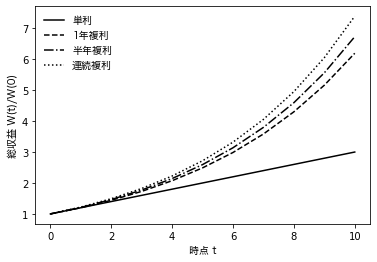

In [4]:
# -*- coding: utf-8 -*-
#%% NumPyの読み込み
import numpy as np
#   MatplotlibのPyplotモジュールの読み込み
import matplotlib.pyplot as plt
#   日本語フォントの設定
from matplotlib.font_manager import FontProperties
import sys
if sys.platform.startswith('win'):
    FontPath = 'C:\\Windows\\Fonts\\meiryo.ttc'
elif sys.platform.startswith('darwin'):
    FontPath = '/System/Library/Fonts/ヒラギノ角ゴシック W4.ttc'
elif sys.platform.startswith('linux'):
    FontPath = '/usr/share/fonts/truetype/takao-gothic/TakaoPGothic.ttf'
jpfont = FontProperties(fname=FontPath)
#%% 単利と複利の比較
r = 0.2        # 利率 20%
Maturity = 10  # 運用期間 10年
Simple_Rate = 1.0 + r * np.linspace(0, Maturity, Maturity + 1)
Compound_1year = np.r_[1.0, np.cumprod(np.tile(1.0 + r, Maturity))]
Compound_6month = np.r_[1.0, np.cumprod(np.tile((1.0 + r/2.0)**2, Maturity))]
Continuous_Rate = np.exp(r*np.linspace(0, Maturity, Maturity + 1))
fig1 = plt.figure(1, facecolor='w')
plt.plot(Simple_Rate, 'k-')
plt.plot(Compound_1year, 'k--')
plt.plot(Compound_6month, 'k-.')
plt.plot(Continuous_Rate, 'k:')
plt.legend([u'単利', u'1年複利', u'半年複利', u'連続複利'],
           loc='upper left', frameon=False, prop=jpfont)
plt.xlabel(u'時点 t', fontproperties=jpfont)
plt.ylabel(u'総収益 W(t)/W(0)', fontproperties=jpfont)
plt.show()

In [5]:
import sys

print(sys.version)

3.8.8 (default, Apr 13 2021, 12:59:45) 
[Clang 10.0.0 ]


matplotlibで簡単に日本語を表示する方法

https://gammasoft.jp/blog/matplotlib-japanese-fonts/

numpy - sum、prod、cumsum、cumprodの使い方

https://pystyle.info/num

np.tile(Numpy配列、繰返し回数)

### 現在価値
利率rで資金を運用したときに現時点のW(0)縁がt年後にいくらになるかを考えたが、逆にt年後にW(t)円受け取るために現時点でいくらの初期投資が必要であるかを考える。

これはW(t)の現時点（t=0）における現在価値によって与えられる。

現在価値とは
#### 「将来の時点tにW(t)円用意しておかなければならないとき、時点0でいくらの預金残高が必要か？」
という疑問に答えるための概念。


見方を変えると
#### 「将来の時点tにW(t)円を獲得するために時点0でPV(0)円を投資しなければならないならば、それは利率rの銀行預金で運用することと同等の投資手段である」
とも解釈できる。

したがって
### 「現在価値とは将来の受取り金額が決まっている投資手段が固定利率の銀行預金と同等になるための初期投資額である」と言える

時点０における現在価値をPV(0)円と表記すると、１年複利の場合の現在価値は

##### PV(0) ＝　W(t)/(1+r)^(t) と定義され、

##### 書き換えると　(1+r)*PV(0) = W(t)  となる。

#### 現在価値を求める際に使用する利率rを割引率とも呼ぶ

### 将来価値
PV(0)がW(0)の現在価値と呼ばれることに対比して、
t年後に受け取る金額w(t)はPV(0)の将来価値と呼ばれる。

利子の支払いが年M回行われるときはt年後に受け取れる金額が与えれるから、これから逆算するとW(t)円の現在価値は

###### PV(0) = W(t) / (1+r/M)^(Mt)

M → ∞ とした利率rの連続複利の場合においても逆算すると

##### PV(0) = e^(-rt) * W(t)

### 現在係数

B(t)をそれぞれ１年複利、1/M年複利、連続複利による割引係数あるいは現在係数とすると、

PV(0) = B(t)* W(t)　と書ける